In [1]:
## Import Libraries
import pandas as pd
import numpy as np
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import csv
from supervenn import supervenn
import os
from scipy import stats
from biomart import BiomartServer
import io
from matplotlib import rcParams
from scipy import stats


## Display all rows of pandas dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
## Import data

df = pd.read_csv("../../data/raw_data/quality_assessment.csv").dropna()

In [3]:
## Create columns
columns = ['sample_size ', 'sex_and_ethnicity', 'ad_diagnose_criteria',
       'control_matching', 'transcript_level_analysis', 'results_validation',
       'sequencing_depth', 'statistical_rigor', 'data_availability',
       'reproducibility', 'average_score_per_study']

In [4]:
## define ggplot colors
ggplot2_colors = ["#F8766D", "#CD9600", "#7CAE00", "#00BE67", "#00BFC4", "#00A9FF", "#C77CFF", "#FF61CC"]

RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

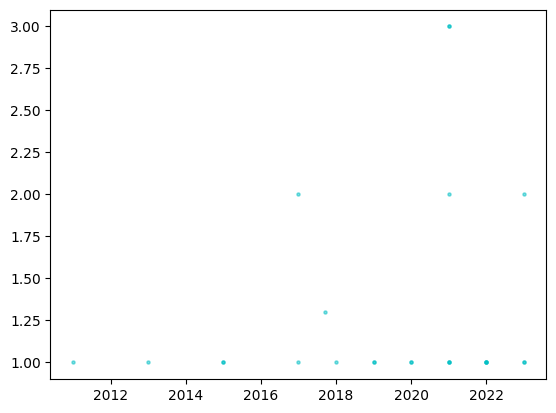

In [5]:
# Initialize an empty list to store the correlation results
total_list = []

# Loop through each column in the list of columns
for column in columns:
    # Clear the current figure to avoid overlapping plots from previous iterations
    plt.clf()
    
    # Create a regression plot using seaborn
    sns.regplot(data=df, x="year", y=column, color=ggplot2_colors[4], lowess=True,
               scatter_kws={"alpha": 0.5, "s": 5}, line_kws={"linewidth": 1})
    
    # Calculate the Spearman correlation coefficient and p-value
    spearman_coeff, spearman_p = stats.spearmanr(df["year"].copy(), df[column].copy())

    # Create a list with the current column's results
    current_list = ["year", column, round(spearman_coeff, 2), round((spearman_coeff * spearman_coeff), 2), spearman_p]
    # Append the current results to the total list
    total_list.append(current_list)

    # Generate the output file name for the plot
    output_name = "../../figures/supplement/quality_assessment_" + column + "_year"

    # Save the plot as a PDF file with high resolution
    plt.savefig(output_name + ".pdf",
                dpi=1200, transparent=True, bbox_inches="tight")

    # Save the plot as a PNG file with high resolution
    plt.savefig(output_name + ".png",
                dpi=1200, transparent=True, bbox_inches="tight")

# Create a DataFrame from the list of correlation results
df_correlations = pd.DataFrame(total_list, columns=['X', 'Y', 'Spearman Coefficient', "R Squared", "Spearman P-value"])

In [ ]:
## Save correlations table
df_correlations.to_csv("../../data/processed_data/quality_assessment/quality_assessment_correlations.tsv", sep="\t", index=True)